# Realised Volatility Indicator

https://www.investopedia.com/terms/h/historicalvolatility.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,197.135651,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,202.898071,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,203.485062,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,204.541672,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,202.624130,25587400


In [3]:
n = 20
rets = df['Adj Close'].pct_change().dropna()
std = rets.rolling(n).std()

In [4]:
historical_vol_annually = std*math.sqrt(252)  
df['HV'] = 100*historical_vol_annually

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,HV
Date,,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,197.135651,67935700,NaN
2018-08-02,200.580002,208.380005,200.350006,207.389999,202.898071,62404000,NaN
2018-08-03,207.029999,208.740005,205.479996,207.990005,203.485062,33447400,NaN
2018-08-06,208.000000,209.250000,207.070007,209.070007,204.541672,25425400,NaN
2018-08-07,209.320007,209.500000,206.759995,207.110001,202.624130,25587400,NaN


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,HV
Date,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,144.656540,37169200,37.129966
2018-12-26,148.300003,157.229996,146.720001,157.169998,154.843475,58582500,45.901041
2018-12-27,155.839996,156.770004,150.070007,156.149994,153.838562,53117100,45.893158
2018-12-28,157.500000,158.520004,154.550003,156.229996,153.917389,42291400,43.005838
2018-12-31,158.529999,159.360001,156.479996,157.740005,155.405045,35003500,43.406725


Text(0.5, 0, 'Date')

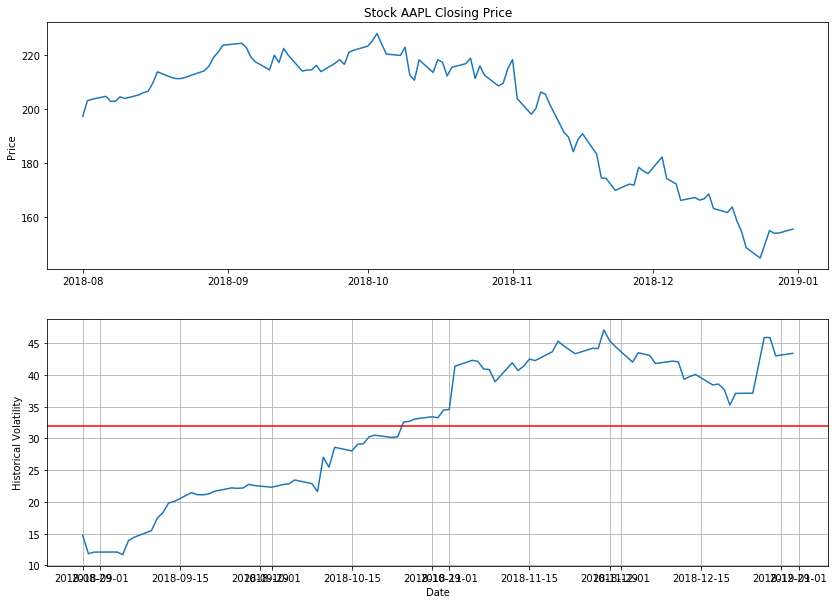

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['HV'], label='Historical Volatility')
ax2.axhline(y=df['HV'].mean(), color='red')
ax2.grid()
ax2.set_ylabel('Historical Volatility')
ax2.set_xlabel('Date')

## Candlestick with Historical Volatility

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HV,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,197.135651,67935700,NaN,False
1,736908.0,200.580002,208.380005,200.350006,207.389999,202.898071,62404000,NaN,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,203.485062,33447400,NaN,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,204.541672,25425400,NaN,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,202.624130,25587400,NaN,False


Text(0.5, 0, 'Date')

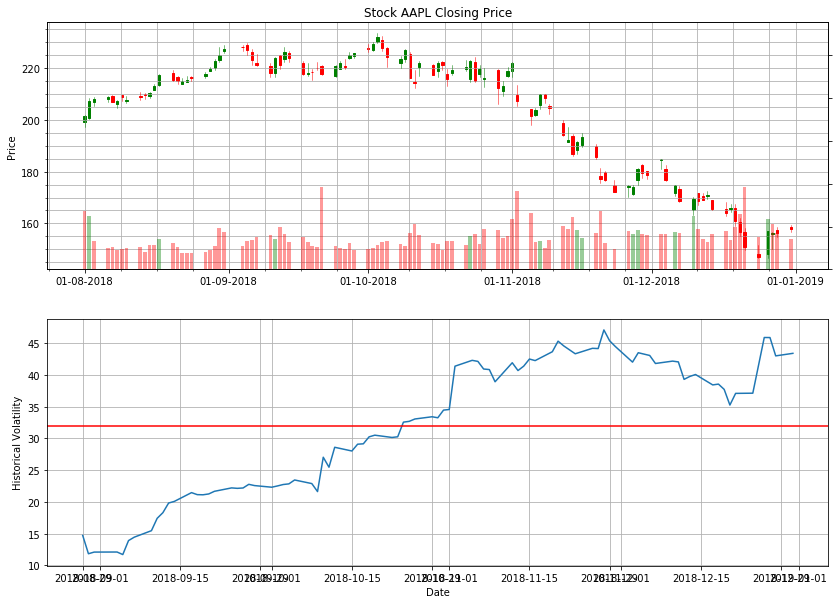

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['HV'], label='Historical Volatility')
ax2.axhline(y=df['HV'].mean(), color='red')
ax2.grid()
ax2.set_ylabel('Historical Volatility')
ax2.set_xlabel('Date')